In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os,csv
from os import walk
import time
from PIL import Image

## Galaxy Zoo

In [2]:
folder = "./GalaxyZoo_kaggle/images_training_rev1/"
f = []
for (dirpath, dirnames, filenames) in walk(folder):
    f.extend(filenames)
    break
fotos = []   
for foto in f:
    if '.jpg' in foto:
        fotos.append(foto)
fotos[:10]
print("Cantidad de imagenes: ",len(fotos))

('Cantidad de imagenes: ', 61578)


In [3]:
labels = pd.read_csv("./GalaxyZoo_kaggle/training_solutions_rev1.csv")
labels.head()

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3    100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4    100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2    ...      Class9.3  Class10.1  Class10.2  \
0  0.578401  0.418398  0.198455    ...      0.000000   0.279952   0.138445   
1  0.165229  0.591328  0.041271    ...      0.018764   0.000000   0.131378   
2  0.177352  0.000000  0.177352    ...      0.000000   0.000000   0.000000   
3  0.129071  0.189098  0.049466    ...      0.000000   0.094549   0.000000   
4  0.000000  0.000000  0.000000    ...      0.000000   0.000000   0.000000   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.000000   0.000000   0.092886        0.0        0.0        0.0   0.325512  
1   0.459950   0.000000   0.591328        0.0        0.0        0.0   0.000000  
2   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  
3   0.094549   0.189098   0.000000        0.0        0.0        0.0   0.000000  
4   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  

[5 rows x 38 columns]

In [4]:
#60mil radom
grande = 60000 #10000 de prueba
chico = 12000 # 2000 de prueba
labels_sample = labels.sample(grande,random_state=200)
fotos_sample = [str(galax_id)+'.jpg' for galax_id in labels_sample.loc[:,"GalaxyID"].values ]
#fotos_sample = [foto for foto in fotos if int(foto.split('.')[0]) in labels_sample.loc[:,"GalaxyID"].values ]
print(labels_sample.shape)
print(len(fotos_sample))

(60000, 38)
60000


In [14]:
labels_sample.head()

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
31990    569297  0.083065  0.916935  0.000000  0.023551  0.893384  0.107109   
41217    701332  0.275109  0.713127  0.011765  0.633523  0.079604  0.079604   
55300    908039  0.411643  0.587223  0.001134  0.234878  0.352345  0.000000   
20625    401459  0.013316  0.986684  0.000000  0.000000  0.986684  0.753419   
34675    607293  0.829407  0.128859  0.041733  0.021519  0.107340  0.000000   

       Class3.2  Class4.1  Class4.2    ...      Class9.3  Class10.1  \
31990  0.786276  0.714189  0.179195    ...      0.000000   0.459257   
41217  0.000000  0.000000  0.079604    ...      0.499005   0.000000   
55300  0.352345  0.205471  0.146874    ...      0.026647   0.205471   
20625  0.233265  0.986684  0.000000    ...      0.000000   0.350273   
34675  0.107340  0.000000  0.107340    ...      0.000000   0.000000   

       Class10.2  Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  \
31990   0.254932   0.000000   0.000000   0.504446   0.000000        0.0   
41217   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
55300   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
20625   0.381847   0.254564   0.191225   0.508621   0.095613        0.0   
34675   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   

       Class11.5  Class11.6  
31990        0.0   0.209744  
41217        0.0   0.000000  
55300        0.0   0.205471  
20625        0.0   0.191225  
34675        0.0   0.000000  

[5 rows x 38 columns]

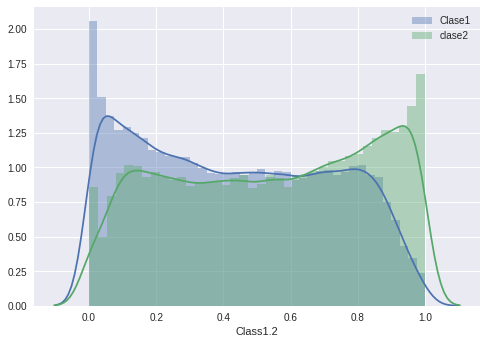

In [23]:
import seaborn as sns
sns.distplot(labels.iloc[:,1],label="Clase1")
sns.distplot(labels.iloc[:,2],label="clase2")
#sns.distplot(labels.iloc[:,3],label="clase3")
plt.legend()
plt.show()

### Crea test y training batchs

In [5]:
#label split
labels_test = labels_sample.sample(10000,random_state=200)
labels_train = labels_sample.drop(labels_test.index)
print("Test labels: ",labels_test.shape)
print("Train labels: ",labels_train.shape)

fotos_test = [str(galax_id)+'.jpg' for galax_id in labels_test.loc[:,"GalaxyID"].values ]
#[foto for foto in fotos_sample if int(foto.split('.')[0]) in labels_test.loc[:,"GalaxyID"].values ]
fotos_train = [str(galax_id)+'.jpg' for galax_id in labels_train.loc[:,"GalaxyID"].values ]
#[foto for foto in fotos_sample if int(foto.split('.')[0]) in labels_train.loc[:,"GalaxyID"].values ]
print("Imagenes test: ",len(fotos_test))
print("Imagenes train: ",len(fotos_train))
#crear una mascara para el test en las imagenes y en las etiquetas.


len_batch = len(fotos_train)/5
batch1 = fotos_train[:len_batch]
print(len(batch1))
batch2 =fotos_train[len_batch:2*len_batch]
batch3 =fotos_train[2*len_batch:3*len_batch]
batch4 =fotos_train[3*len_batch:4*len_batch]
batch5 = fotos_train[4*len_batch:]

batchs = [batch1,batch2,batch3,batch4,batch5]

#Guardar 1 batch y ver cuanto pesa con el tamano a reducir..

('Test labels: ', (10000, 38))
('Train labels: ', (50000, 38))
('Imagenes test: ', 10000)
('Imagenes train: ', 50000)
10000


In [22]:
b = open('batch1.csv', 'a') #cambiar "w" por "a"
#a = csv.writer(b)

start_time = time.time()
contador = 0
size= 100 #taamano a reducir la imagen
for foto in batch1:
    if contador%500==0:
        print("El contador va en: ",contador)
    #achicar imagen
    imagen = Image.open(folder+foto)
    half_the_width = imagen.size[0] / 2
    half_the_height = imagen.size[1] / 2
    imagen_crop = imagen.crop(
        (
            half_the_width - 150,
            half_the_height - 150,
            half_the_width + 150,
            half_the_height + 150
        )
    )

    aux = imagen_crop.resize((size,size),Image.ANTIALIAS)
    
    #a matriz y luego a vector
    imagen_array = np.asarray(aux)
    imagen_array = imagen_array.transpose([2,0,1])
    vector_imagen = np.reshape(imagen_array, imagen_array.shape[0]*imagen_array.shape[1]*imagen_array.shape[2])
    
    #guardar vector imagen
    #a.writerow(vector_imagen)
    np.savetxt(b,[vector_imagen],fmt='%i',delimiter=',')

    #data.append(plt.imread(folder+foto))
    #plt.imread(folder+foto)
    del imagen
    del aux
    del imagen_array
    del vector_imagen
    contador+=1
b.close()
print("Termino en ",time.time()-start_time)

('El contador va en: ', 0)
('El contador va en: ', 500)
('El contador va en: ', 1000)
('El contador va en: ', 1500)
('Termino en ', 41.301064014434814)


In [31]:
#pd.read_csv("bath1.csv",header=None).head()
aux = np.loadtxt("batch1.csv", delimiter=',')
#aux = aux.reshape((aux.shape[0],3,100,100)) #para reconstruir
aux.shape

(2000, 30000)

In [ ]:
imagen = aux[0]
imagen = imagen_array.transpose([1, 2, 0])
plt.imshow(imagen)
plt.show()

In [ ]:
pd.read_csv("bath1.csv",header=None).shape

## Guardar Datos

In [6]:
## lo mismo de arriba pero para cada batch..

#training batchs
contador = 0
for i,batch in enumerate(batchs):
    b = open('train_batch'+str(i+1)+'.csv', 'a') #cambiar "w" por "a"
    
    start_time = time.time()
    size= 100 #taamano a reducir la imagen
    for foto in batch:
        if contador%2500==0:
            print("El contador va en: ",contador)
        #achicar imagen
        imagen = Image.open(folder+foto)
        aux = imagen.resize((size,size),Image.ANTIALIAS)

        #a matriz y luego a vector
        imagen_array = np.asarray(aux,dtype=np.uint8)
        imagen_array = imagen_array.transpose([2,0,1])
        vector_imagen = np.reshape(imagen_array, imagen_array.shape[0]*imagen_array.shape[1]*imagen_array.shape[2])

        #guardar vector imagen
        np.savetxt(b,[vector_imagen],fmt='%i',delimiter=',')

        del imagen
        del aux
        del imagen_array
        del vector_imagen
        contador+=1
    b.close()
    print("Termino un batch en ",time.time()-start_time)

#test set
b = open('test.csv', 'a') #cambiar "w" por "a"

start_time = time.time()
size= 100 #taamano a reducir la imagen
for foto in fotos_test:
    if contador%2500==0:
        print("El contador va en: ",contador)
    #achicar imagen
    imagen = Image.open(folder+foto)
    aux = imagen.resize((size,size),Image.ANTIALIAS)

    #a matriz y luego a vector
    imagen_array = np.asarray(aux,dtype=np.uint8)
    imagen_array = imagen_array.transpose([2,0,1])
    vector_imagen = np.reshape(imagen_array, imagen_array.shape[0]*imagen_array.shape[1]*imagen_array.shape[2])

    #guardar vector imagen
    np.savetxt(b,np.asarray([vector_imagen],dtype=np.uint8),fmt='%i',delimiter=',')

    del imagen
    del aux
    del imagen_array
    del vector_imagen
    contador+=1
b.close()
print("Termino Test en ",time.time()-start_time)


('El contador va en: ', 0)
('El contador va en: ', 2500)
('El contador va en: ', 5000)
('El contador va en: ', 7500)
('Termino un batch en ', 342.3984830379486)
('El contador va en: ', 10000)
('El contador va en: ', 12500)
('El contador va en: ', 15000)
('El contador va en: ', 17500)
('Termino un batch en ', 346.0176739692688)
('El contador va en: ', 20000)
('El contador va en: ', 22500)
('El contador va en: ', 25000)
('El contador va en: ', 27500)
('Termino un batch en ', 343.6179928779602)
('El contador va en: ', 30000)
('El contador va en: ', 32500)
('El contador va en: ', 35000)
('El contador va en: ', 37500)
('Termino un batch en ', 338.12108397483826)
('El contador va en: ', 40000)
('El contador va en: ', 42500)
('El contador va en: ', 45000)
('El contador va en: ', 47500)
('Termino un batch en ', 346.44928193092346)
('El contador va en: ', 50000)
('El contador va en: ', 52500)
('El contador va en: ', 55000)
('El contador va en: ', 57500)
('Termino Test en ', 358.48317193984985)


In [7]:
#guardar etiquetas
labels_test.to_csv("test_labels.csv",index=False)
labels_train.to_csv("train_labels.csv",index=False)

In [ ]:
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa

### Verificar que se guardaron bien

In [3]:
X_test = pd.read_csv("GalaxyZoo_kaggle/dataset_chico/test.csv.gz",header=None)
#aux = np.loadtxt("batch1.csv", delimiter=',')
#aux = aux.reshape((aux.shape[0],3,100,100)) #para reconstruir
print(X_test.shape)
X_test.head()

(2000, 30000)


0      1      2      3      4      5      6      7      8      9      \
0      6      1      2      3      0      4     10      2      2      2   
1      4      5      5      4      6      8      4      3     10      5   
2     13     12      5      1      5      9     10     13     16     10   
3      6      5      6      3      5      6      2      4      6      6   
4      7      6      6      5      4      3      5      2      2      4   

   ...    29990  29991  29992  29993  29994  29995  29996  29997  29998  29999  
0  ...       10      1      1      5     11      5      4      2      5      7  
1  ...        1      1      0      2      8      4      0      5      4      1  
2  ...        5      3      1      1      0      0      1      5      4      0  
3  ...       25     11      1      2      8      1      6      4      3      1  
4  ...       27     29     21     28     21     17     11      9     22     19  

[5 rows x 30000 columns]

In [12]:
X_test_numpy = np.loadtxt("GalaxyZoo_kaggle/dataset_chico/test.csv", delimiter=',')
X_test_numpy

array([[  6.,   1.,   2., ...,   2.,   5.,   7.],
       [  4.,   5.,   5., ...,   5.,   4.,   1.],
       [ 13.,  12.,   5., ...,   5.,   4.,   0.],
       ..., 
       [  4.,   2.,   4., ...,  10.,   7.,   0.],
       [  1.,   1.,   2., ...,   0.,   2.,   0.],
       [  4.,   4.,   3., ...,   2.,   6.,   4.]])

In [4]:
X_test_numpy = X_test_numpy.astype(np.uint8)

array([[ 6,  1,  2, ...,  2,  5,  7],
       [ 4,  5,  5, ...,  5,  4,  1],
       [13, 12,  5, ...,  5,  4,  0],
       ..., 
       [ 4,  2,  4, ..., 10,  7,  0],
       [ 1,  1,  2, ...,  0,  2,  0],
       [ 4,  4,  3, ...,  2,  6,  4]], dtype=uint8)

In [3]:
X_test = pd.read_csv("GalaxyZoo_kaggle/dataset_chico/test.csv",header=None)

In [7]:
aux = X_test.values.reshape((X_test.shape[0],3,100,100))/255.0#.astype(np.uint8) #para reconstruir
aux = aux.transpose([0, 2, 3, 1])
imagen = aux[0]
#plt.imshow(imagen)
#plt.show()

In [8]:
imagen[:,:,0]

array([[ 6,  1,  2, ..., 28, 28, 17],
       [ 9,  5,  2, ..., 34, 22, 18],
       [10,  8,  2, ..., 26, 25, 19],
       ..., 
       [ 3,  1,  2, ...,  2,  1,  5],
       [ 0,  2,  6, ...,  7,  7,  5],
       [ 1,  8, 10, ...,  4,  7,  9]])

In [19]:
imagen[:,:,2]

array([[ 5,  0,  0, ...,  8, 11,  7],
       [ 7,  3,  0, ..., 15,  5,  9],
       [ 8,  5,  0, ...,  6,  8,  9],
       ..., 
       [ 2,  0,  0, ...,  1,  0,  3],
       [ 0,  1,  5, ...,  5,  5,  3],
       [ 0,  6,  8, ...,  2,  5,  7]])

In [20]:
np.dot(imagen[:,:,0],imagen[:,:,2])

array([[3145, 4920, 2880, ..., 4265, 4936, 4780],
       [4315, 6798, 3784, ..., 5448, 6329, 6082],
       [5537, 8891, 4722, ..., 6665, 7949, 7313],
       ..., 
       [2987, 4098, 1702, ..., 2159, 2622, 2600],
       [2056, 2763, 1433, ..., 1939, 2141, 2093],
       [1211, 1664, 1209, ..., 1744, 1627, 1697]])

In [36]:
type(aux[0,0,0,0])

numpy.int64

In [9]:
plt.imshow(imagen)
plt.show()

ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

In [29]:
imagen.astype('int')

array([[[ 6,  6,  5],
        [ 1,  1,  0],
        [ 2,  2,  0],
        ..., 
        [28, 17,  8],
        [28, 18, 11],
        [17, 15,  7]],

       [[ 9,  9,  7],
        [ 5,  5,  3],
        [ 2,  2,  0],
        ..., 
        [34, 24, 15],
        [22, 12,  5],
        [18, 16,  9]],

       [[10, 10,  8],
        [ 8,  8,  5],
        [ 2,  2,  0],
        ..., 
        [26, 15,  6],
        [25, 14,  8],
        [19, 16,  9]],

       ..., 
       [[ 3,  3,  2],
        [ 1,  1,  0],
        [ 2,  2,  0],
        ..., 
        [ 2,  2,  1],
        [ 1,  1,  0],
        [ 5,  5,  3]],

       [[ 0,  0,  0],
        [ 2,  2,  1],
        [ 6,  6,  5],
        ..., 
        [ 7,  7,  5],
        [ 7,  7,  5],
        [ 5,  5,  3]],

       [[ 1,  1,  0],
        [ 8,  8,  6],
        [10, 10,  8],
        ..., 
        [ 4,  4,  2],
        [ 7,  7,  5],
        [ 9,  9,  7]]])

In [11]:
im = plt.imread(folder+fotos[0])

imagen = Image.open(folder+fotos[0])
aux = imagen.resize((300,300),Image.ANTIALIAS)
imagen.shape

AttributeError: 'JpegImageFile' object has no attribute 'shape'

In [25]:
np.asarray(aux).shape

(300, 300, 3)

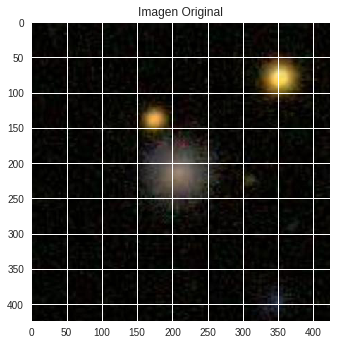

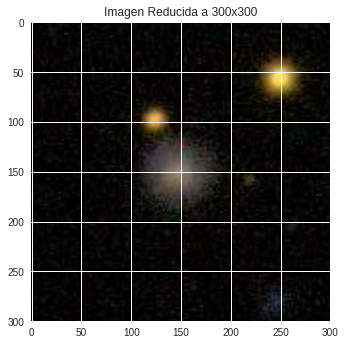

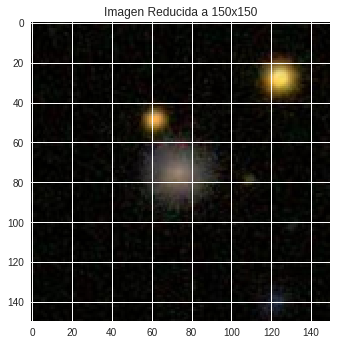

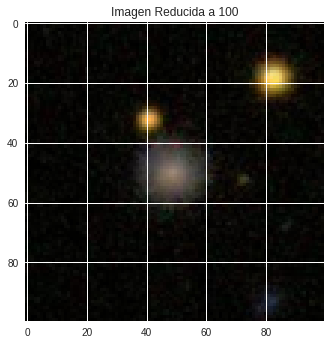

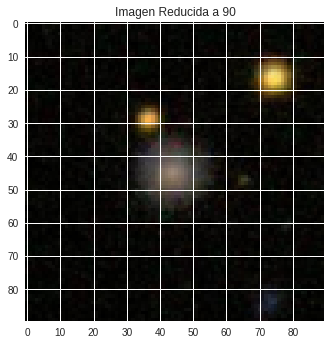

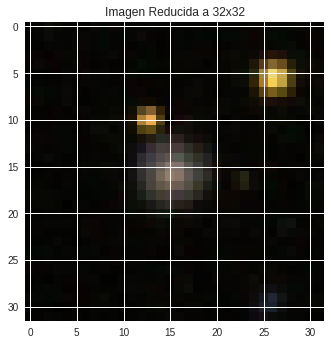

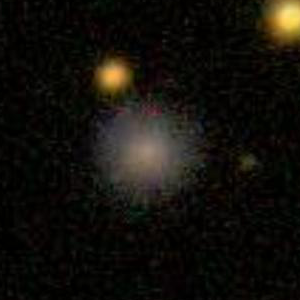

In [14]:
im = plt.imread(folder+fotos[1])
from PIL import Image
imagen = Image.open(folder+fotos[1])

plt.title("Imagen Original")
plt.imshow(im)
plt.show()
plt.title("Imagen Reducida a 300x300")
plt.imshow(imagen.resize((300,300),Image.ANTIALIAS))
plt.show()
plt.title("Imagen Reducida a 150x150")
plt.imshow(imagen.resize((150,150),Image.ANTIALIAS))
plt.show()
plt.title("Imagen Reducida a 100")
plt.imshow(imagen.resize((100,100),Image.ANTIALIAS))
plt.show()
plt.title("Imagen Reducida a 90")
plt.imshow(imagen.resize((90,90),Image.ANTIALIAS))
plt.show()
plt.title("Imagen Reducida a 32x32")
plt.imshow(imagen.resize((32,32),Image.ANTIALIAS))
plt.show()

half_the_width = imagen.size[0] / 2
half_the_height = imagen.size[1] / 2
imagen_crop = imagen.crop(
    (
        half_the_width - 150,
        half_the_height - 150,
        half_the_width + 150,
        half_the_height + 150
    )
)
imagen_crop

In [8]:
half_the_width = imagen.size[0] / 2
half_the_height = imagen.size[1] / 2
imagen_crop = imagen.crop(
    (
        half_the_width - 100,
        half_the_height - 100,
        half_the_width + 100,
        half_the_height + 100
    )
)
plt.title("Imagen Crop")
plt.imshow(imagen_crop,Image.ANTIALIAS)
plt.show()

ValueError: Colormap 1 is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

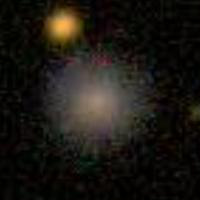

In [13]:
imagen_crop

In [34]:
im_chanels = im.transpose([2,0,1])
print(im.shape)
#ver de alguna forma comprimir la imagen
vector_imagen = np.reshape(im_chanels, im_chanels.shape[0]*im_chanels.shape[1]*im_chanels.shape[2])
print(vector_imagen.shape)

(424, 424, 3)
(539328,)


In [38]:
# cuando se tienen todos los vectores de las imagenes guardar en csv
np.savetxt('galaxyzoo_images.csv', np.asarray([vector_imagen,vector_imagen]), delimiter=',',fmt='%i')   # X is an array

In [20]:
def imagen_a_matriz(name):
    im = plt.imread(name)

    return im.transpose([2,0,1])
    #return np.asarray([im[:,:,0],im[:,:,1],im[:,:,2]])
def matrix_a_imagen(matrix):
    return im.transpose([1, 2, 0])

def imagen_a_vector(name):
    im = plt.imread(folder+fotos[0])

    return im.transpose([2,0,1])

#reconstruir
imagen = vector_imagen.reshape(3,424,424)
imagen = imagen.transpose([1, 2, 0])

im = transpose_image(im)
im.shape

(3, 424, 424)

In [23]:
vector_imagen = np.reshape(im, im.shape[0]*im.shape[1]*im.shape[2])
vector_imagen.shape

(539328,)

In [ ]:
42

In [25]:
aux = vector_imagen.reshape(3,424*424).copy()
canal_r = aux[0].reshape(424,424)
canal_g = aux[1].reshape(424,424)
canal_b = aux[2].reshape(424,424)

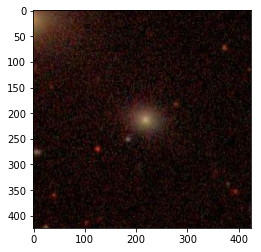

In [27]:
imagen = vector_imagen.reshape(3,424,424)
imagen = imagen.transpose([1, 2, 0])
plt.imshow(imagen)
plt.show()

# Volcanes

In [2]:
folder_images = "./Volcanes/Images/"
f = []
for (dirpath, dirnames, filenames) in walk(folder_images):
    f.extend(filenames)
    break
fotos = []   
for foto in f:
    if '.sdt' in foto:
        fotos.append(foto)
print(fotos[:10])
print("Cantidad de imagenes: ",len(fotos))

['img23.sdt', 'img97.sdt', 'img53.sdt', 'img64.sdt', 'img62.sdt', 'img96.sdt', 'img87.sdt', 'img37.sdt', 'img33.sdt', 'img94.sdt']
('Cantidad de imagenes: ', 134)


In [3]:
folder_groundtruths = "./Volcanes/GroundTruths/"
f = []
for (dirpath, dirnames, filenames) in walk(folder_groundtruths):
    f.extend(filenames)
    break
labels = []   
for label in f:
    if '.lxyr' in label and '-bad' not in label:
        labels.append(label)
print(labels[:10])
print("Cantidad de labels: ",len(labels))

['img107.lxyr', 'img74.lxyr', 'img26.lxyr', 'img87.lxyr', 'img38.lxyr', 'img89.lxyr', 'img81.lxyr', 'img96.lxyr', 'img109.lxyr', 'img33.lxyr']
('Cantidad de labels: ', 134)


In [4]:
#ABRIR IMAGEN
def open_image(name):
    f = open(name, 'rb')
    im = Image.frombytes('L', (1024, 1024), f.read())
    return np.asarray(im)

"""
for foto in fotos:
    image_array = open_image(folder_images+foto)
    
    w_small,h_small = image_array.shape/5 #imagenes cuadradas
    for i in range(1,5):
        init = w*i
        finit = w*(i+1)
        
        mini_image = image_array[init:finit,init:finit]
    
    abrir imagen y hacer el corte (4*4)? ver como quedan
"""

'\nfor foto in fotos:\n    image_array = open_image(folder_images+foto)\n    \n    w_small,h_small = image_array.shape/5 #imagenes cuadradas\n    for i in range(1,5):\n        init = w*i\n        finit = w*(i+1)\n        \n        mini_image = image_array[init:finit,init:finit]\n    \n    abrir imagen y hacer el corte (4*4)? ver como quedan\n'

In [39]:
fotos[-1]

'img10.sdt'

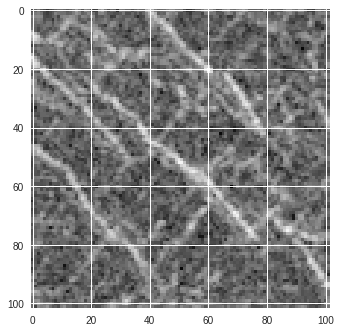

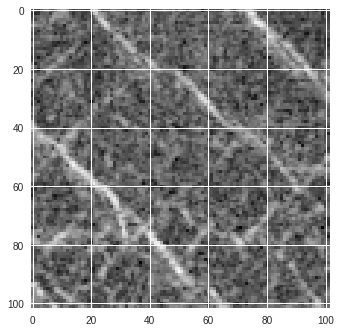

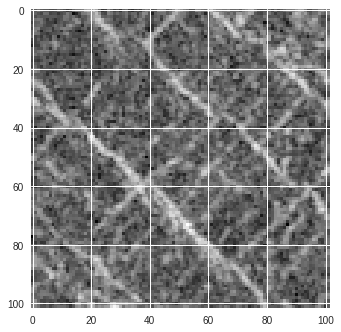

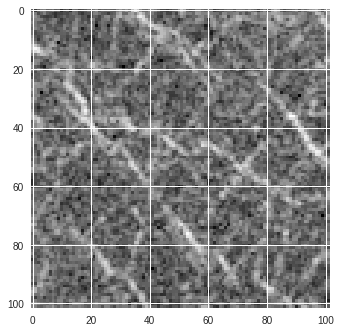

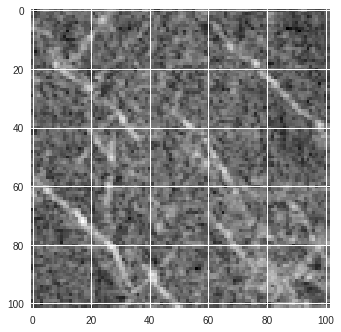

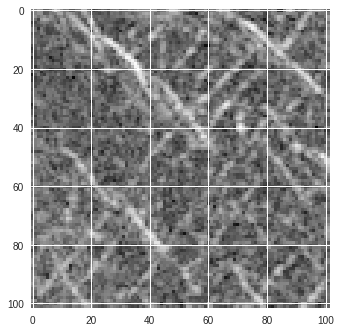

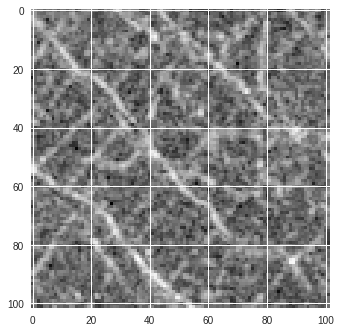

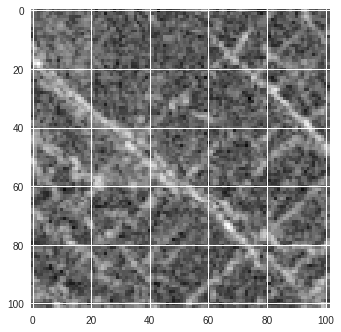

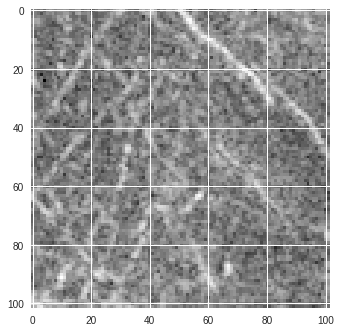

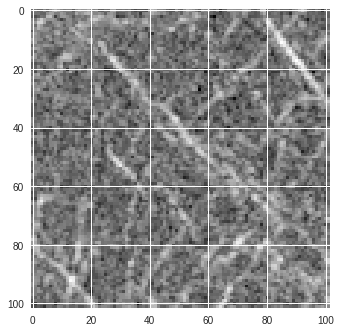

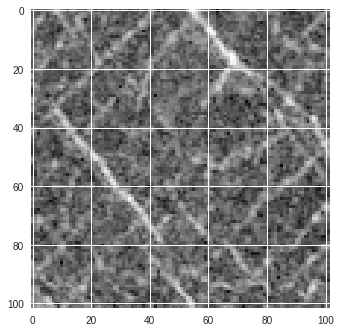

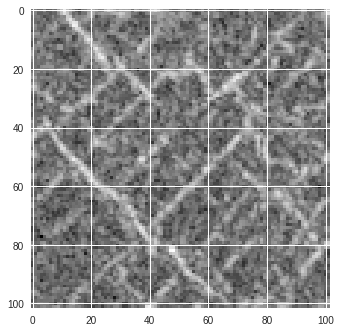

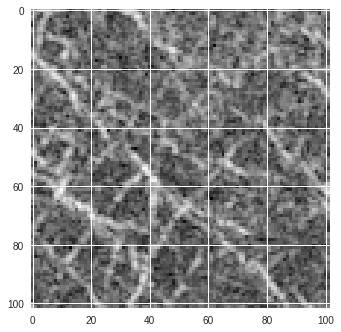

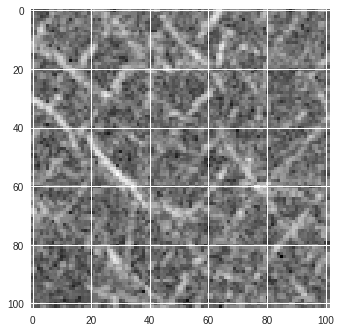

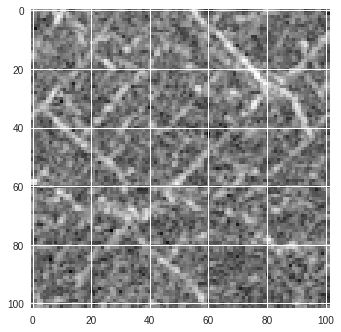

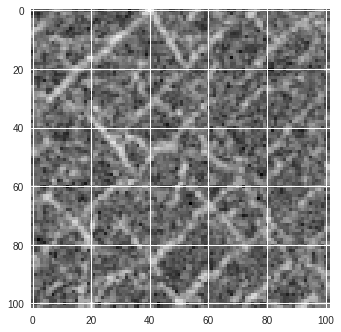

In [40]:
image_array = open_image(folder_images+fotos[-1])

w_small = image_array.shape[0]/10 #imagenes cuadradas
h_small = image_array.shape[1]/10
for i in range(1,5):
    for j in range(1,5):
        init_w = w_small*i
        finit_w = w_small*(i+1)
        
        init_h = h_small*j
        finit_h = h_small*(j+1)
        

        mini_image = image_array[init_w:finit_w,init_h:finit_h]

        #plt.figure(figsize=(14,14))
        plt.imshow(mini_image,cmap='gray')
        plt.show()

In [41]:
import re
number_without_labels = []
without_labels = []
for label in labels:
    aux = pd.read_csv(folder_groundtruths+label,names=["label","x","y","radius"])
    if aux.shape[0] == 0:
        number_without_labels.append(int(re.findall(r'\d+',label)[0]))
        without_labels.append(label)
print(without_labels)

['img107.lxyr', 'img120.lxyr', 'img102.lxyr', 'img5.lxyr', 'img85.lxyr', 'img117.lxyr', 'img127.lxyr', 'img114.lxyr', 'img128.lxyr', 'img99.lxyr', 'img86.lxyr', 'img100.lxyr', 'img93.lxyr', 'img91.lxyr', 'img106.lxyr', 'img116.lxyr']


In [42]:
radios = []
xs = []
ys =[]
volcanes = []
for label in labels:
    if label not in without_labels:
        aux = pd.read_csv(folder_groundtruths+label,names=["label","x","y","radius"],sep=' ')
        volcanes.append(aux.shape[0])
        radios += aux["radius"].values.tolist()
        xs += aux["x"].values.tolist()
        ys += aux["y"].values.tolist()
print(radios[:5])
print("Maximo radio: ",np.max(radios))
print("Minimo radio: ",np.min(radios))
print("Maximo x; ",np.max(xs))
print("Minimo x; ",np.min(xs))
print("Maximo y; ",np.max(ys))
print("Minimo y: ",np.min(ys))
print("Minimo volcanes por imagen:",np.min(volcanes))
print("Maximos volcanes por imagen:",np.max(volcanes))
print("Cantidad de volcanes en el dataset: ",np.sum(volcanes))

[30.08, 34.06, 29.61, 28.32, 28.32]
('Maximo radio: ', 87.659999999999997)
('Minimo radio: ', 1.0)
('Maximo x; ', 1022.0)
('Minimo x; ', 6.0)
('Maximo y; ', 1020.0)
('Minimo y: ', 5.0)
('Minimo volcanes por imagen:', 1)
('Maximos volcanes por imagen:', 65)
('Cantidad de volcanes en el dataset: ', 1520)


In [43]:
df_trabajar = pd.read_csv(folder_groundtruths+labels[1],names=["label","x","y","radius"],sep=' ')
df_trabajar.head()

label      x      y  radius
0      3  606.0  183.0   30.08
1      1  839.0  162.0   34.06
2      1  772.0  346.0   29.61
3      2  816.0  368.0   28.32
4      2  968.0  446.0   28.32

In [44]:
number_without_labels

[107, 120, 102, 5, 85, 117, 127, 114, 128, 99, 86, 100, 93, 91, 106, 116]

In [45]:
dataset = []
for i in range(1,135):
    if i not in number_without_labels:
        img = 'img'+str(i)+'.sdt'
        label = 'img'+str(i)+'.lxyr'
        dataset.append([img,label])
df = pd.DataFrame(data=dataset,columns=["Image","Label"])
df.to_csv("match_dataset.csv",index=False)
df.head()

Image      Label
0  img1.sdt  img1.lxyr
1  img2.sdt  img2.lxyr
2  img3.sdt  img3.lxyr
3  img4.sdt  img4.lxyr
4  img6.sdt  img6.lxyr

In [5]:
df_match = pd.read_csv("./Volcanes/match_dataset.csv")
df_trabajar = pd.read_csv(folder_groundtruths+df_match["Label"][0],names=["label","x","y","radius"],sep=' ')
df_trabajar.head()

label      x      y     radius
0      1  293.0  794.0  21.930000
1      1  232.0  654.0  32.980000
2      1  331.0  696.0  23.540001
3      1  349.0  776.0  16.969999
4      2  353.0  764.0  12.040000

In [47]:
#ver si el x,y se refiere a los pixeles
#label x y radius
#(1 = definitely a volcano,2 = probably, 3 = possibly, 4 = only a pit is visible)

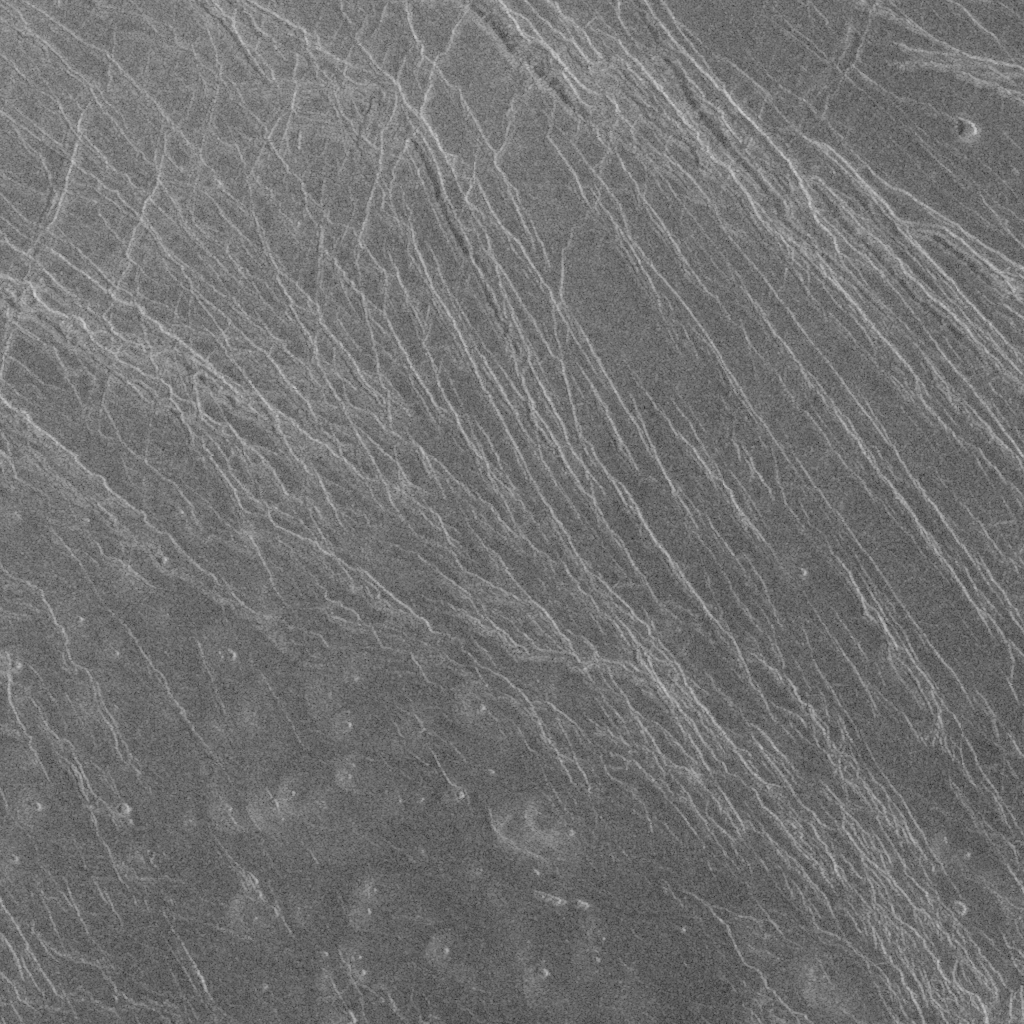

In [48]:
from scipy.io import loadmat
from PIL import Image

#Each image is 1024 X 1024 X (unsigned) 8-bit
#L (8-bit pixels, black and white)

f = open(folder_images+df_match["Image"][0], 'rb')
text = f.read()
    
#
im = Image.frombytes('L', (1024, 1024), text)
im

In [22]:
np.array(im).shape

(1024, 1024)

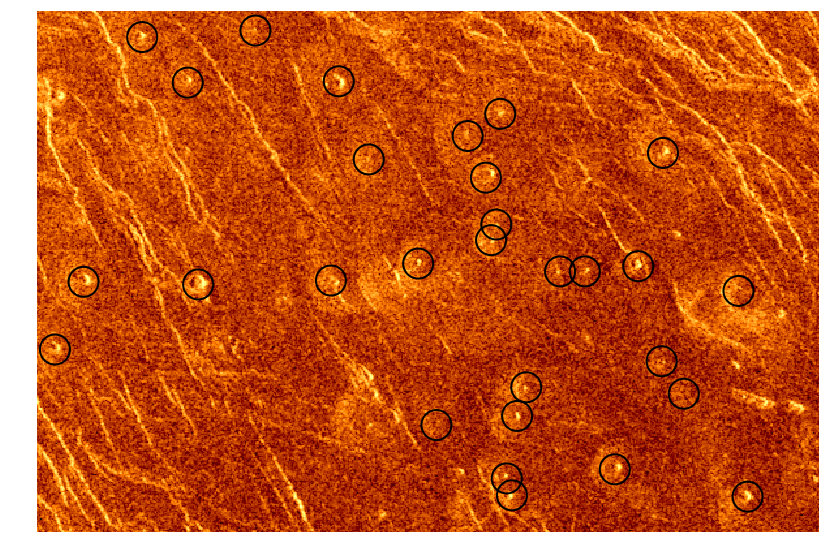

In [22]:
plt.figure(figsize=(14,14))
plt.imshow(np.array(im)[:,:],cmap="afmhot") #copper or afmhot or gray

for a,x,y,r in df_trabajar.values:
    pass
    plt.scatter(x,y,s=900,facecolor="None",edgecolor='black',marker='o',linewidths=2)
plt.ylim(1000,600)
plt.xlim(0,600)
plt.axis('off')
plt.show()

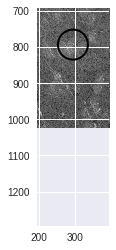

In [27]:
plt.imshow(np.array(im),cmap="gray")

x =293
y =794
plt.scatter(x,y,s=900,facecolor="None",edgecolor='black',marker='o',linewidths=2)
plt.ylim(y+500,y-100)
plt.xlim(x-100,x+100)
#plt.axis('off')
plt.show()

In [166]:
np.array(im)

array([[120, 133, 155, ..., 121, 133, 117],
       [132, 115, 134, ...,  99, 125, 120],
       [132, 110, 126, ..., 113, 119, 115],
       ..., 
       [104,  92, 105, ..., 143, 146, 147],
       [123, 112,  90, ..., 121, 132, 131],
       [136, 110, 112, ..., 115, 131, 129]], dtype=uint8)

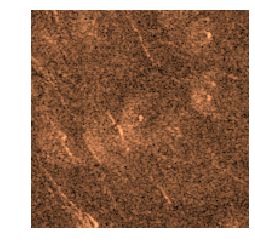

In [29]:
plt.figure(figsize=(4,4))
plt.imshow(np.array(im)[y-90:y+90,x-90:x+90],cmap="copper")
plt.axis('off')
plt.show()

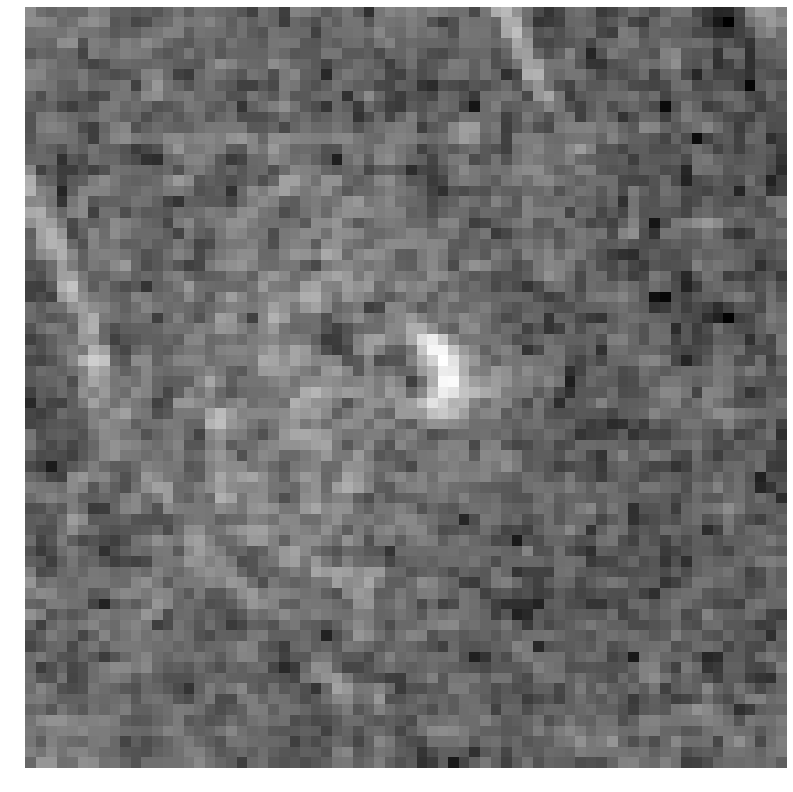

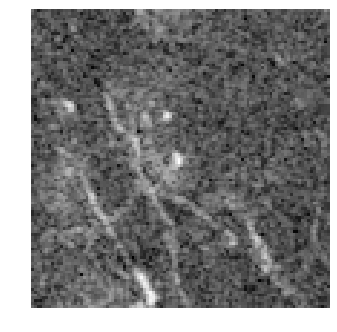

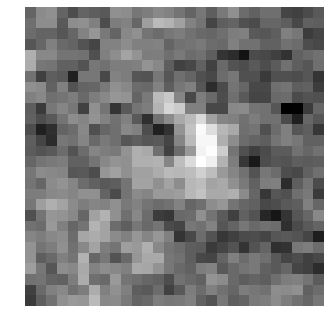

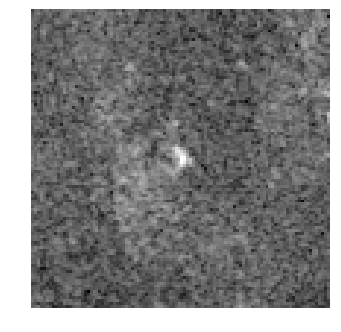

In [7]:
df_match = pd.read_csv("./Volcanes/match_dataset.csv")

foto,label = df_match.values[0]

image_array = open_image(folder_images+foto)
label_array = pd.read_csv(folder_groundtruths+label,names=["label","x","y","radius"],sep=' ').values

delta = 55 #tamanno de la iamgen

for tipo,x,y,r in label_array:
    posible_nuevo_tamanno = []
    error =False
    
    if int(y)-delta < 0: #muy arriba
        posible_nuevo_tamanno.append(int(y))
        error=True
    
    if int(y)+delta > image_array.shape[0]: #muy abajo
        posible_nuevo_tamanno.append(image_array.shape[0]-int(y))
        error=True
        
    if int(x)-delta < 0: #a la izquierda 
        posible_nuevo_tamanno.append(int(x))
        error=True
    
    if int(x)+delta > image_array.shape[1]: #a la derecha
        posible_nuevo_tamanno.append(image_array.shape[1]-int(x))
        error=True
    
    if not error:
        sub_image = image_array[int(y)-delta:int(y)+delta,int(x)-delta:int(x)+delta] #imagenes cuadradas
    else:
        #contarlos, si son pocos quizas eliminarlos
        
        #si nuevo_delta muy pequeño quizas eliminarlo
        
        #nuevo delta
        nuevo_delta = np.min(posible_nuevo_tamanno) #nuevo
    
        aux_image = image_array[int(y)-nuevo_delta:int(y)+nuevo_delta,int(x)-nuevo_delta:int(x)+nuevo_delta]
        
        #agrandar imagen para que calce con delta..
        im = Image.fromarray(aux_image)
        im.thumbnail([delta*2,delta*2],Image.ANTIALIAS)
        
        sub_image =np.asarray(im)
        plt.imshow(sub_image,cmap='gray')
        plt.axis('off')
        plt.show()


        
    #print(sub_image.shape)
    
    if sub_image.shape[0] == 0 or sub_image.shape[1] == 0:
        print(x)
        print(y)
    
        #plt.figure(figsize=(14,14))
    #plt.imshow(sub_image,cmap='gray')
    #plt.axis('off')
    #plt.show()

### Imagenes con volcanes

In [6]:
contador=0
contador_eliminados=0
delta = 55 #tamanno de la iamgen

imagenes_volcanes =[]
labels_extras = []

for foto,label in df_match.values:
    image_array = open_image(folder_images+foto)
    label_array = pd.read_csv(folder_groundtruths+label,names=["label","x","y","radius"],sep=' ').values

    for tipo,x,y,r in label_array:
        posible_nuevo_tamanno = []
        error =False
        no=False

        if int(y)-delta < 0: #muy arriba
            posible_nuevo_tamanno.append(int(y))
            error=True

        if int(y)+delta > image_array.shape[0]: #muy abajo
            posible_nuevo_tamanno.append(image_array.shape[0]-int(y))
            error=True

        if int(x)-delta < 0: #a la izquierda 
            posible_nuevo_tamanno.append(int(x))
            error=True

        if int(x)+delta > image_array.shape[1]: #a la derecha
            posible_nuevo_tamanno.append(image_array.shape[1]-int(x))
            error=True

        if not error:
            sub_image = image_array[int(y)-delta:int(y)+delta,int(x)-delta:int(x)+delta] #imagenes cuadradas
        else:
            #nuevo delta
            nuevo_delta = np.min(posible_nuevo_tamanno) #nuevo
            contador +=1

            #si nuevo_delta muy pequeño quizas eliminarlo
            if nuevo_delta >=25:
                aux_image = image_array[int(y)-nuevo_delta:int(y)+nuevo_delta,int(x)-nuevo_delta:int(x)+nuevo_delta]
                #agrandar imagen para que calce con delta..
                im = Image.fromarray(aux_image)
                im = im.resize([delta*2,delta*2],Image.ANTIALIAS)

                sub_image =np.asarray(im)
                
            else:
                contador_eliminados+=1
                no = True
                
        if not no:
            imagenes_volcanes.append(sub_image)
            
            #ver si puedo la cantidad de volcanos
            volcan_auxiliar = 0
            for tipo2,x2,y2,r2 in label_array: #volcanes auxiliares
                d = np.sqrt( np.square(x-x2)+np.square(y-y2) ) #distancia entre centros

                if d <= delta -15: #si volcan auxiliar esta dentro de la foto
                    volcan_auxiliar +=1 
            #add extra labels
            labels_extras.append(np.asarray([tipo,r,volcan_auxiliar]))

print("Son %d limites"%contador)
print("De esos fueron eliminados %d"%contador_eliminados)

Son 228 limites
De esos fueron eliminados 86


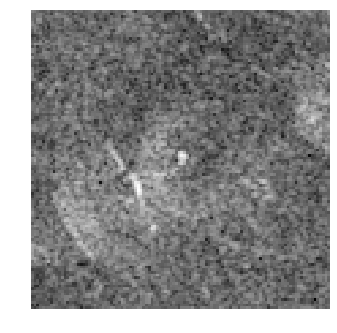

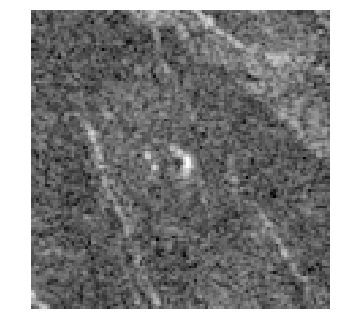

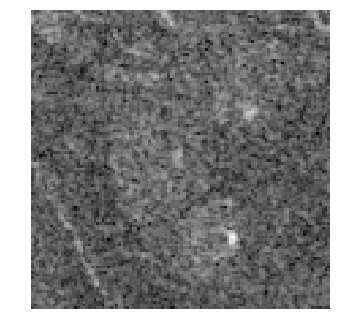

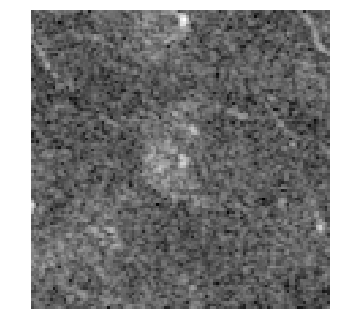

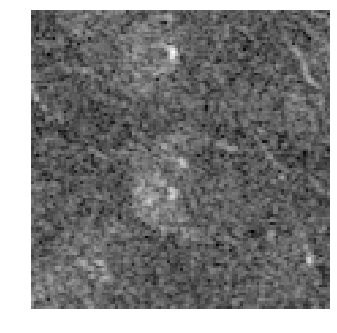

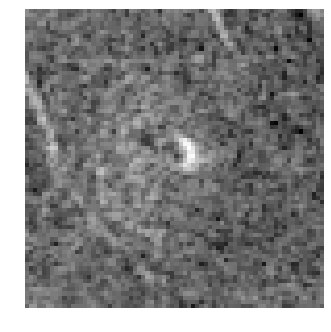

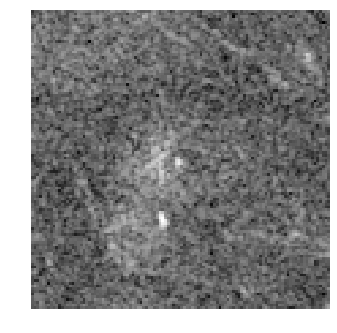

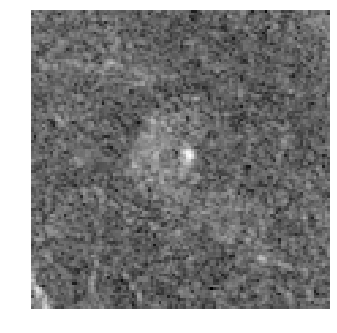

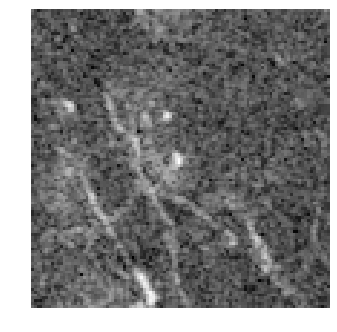

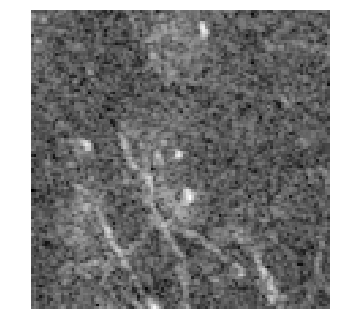

In [36]:
for i in range(10):
    plt.imshow(imagenes_volcanes[i],cmap='gray')
    plt.axis('off')
    plt.show()

In [49]:
np.asarray(imagenes_volcanes).shape

(1434, 110, 110)

### Imagenes sin volcan

In [7]:
from random import randint

contador=0
delta = 55 #tamanno de la iamgen
imagenes_sin_volcanes = []

for foto,label in df_match.values:
    image_array = open_image(folder_images+foto)
    label_array = pd.read_csv(folder_groundtruths+label,names=["label","x","y","radius"],sep=' ').values
    
    used_x =[]
    used_y =[]
    
    for i in range(100): #sino aumentar esto
        position_x = randint(0+delta, 1024-delta)
        while(position_x in used_x):
            position_x = randint(0+delta, 1024-delta)
        used_x.append(position_x)  
        
        position_y = randint(0+delta, 1024-delta)
        while(position_y in used_y):
            position_y = randint(0+delta, 1024-delta)
        used_y.append(position_y)
    
        for tipo,x,y,r in label_array:
            d = np.sqrt( np.square(x-position_x)+np.square(y-position_y) ) #distancia entre centros

            #verificar si position_x y position_y estan cerca de algun volcan
            if d >= r + delta + 40: #si no lo estan
                sub_image = image_array[position_y-delta:position_y+delta,position_x-delta:position_x+delta]
                contador+=1

                imagenes_sin_volcanes.append(sub_image)

print("Se encontraron %d imagenes sin volcanes"%contador)

Se encontraron 146268 imagenes sin volcanes


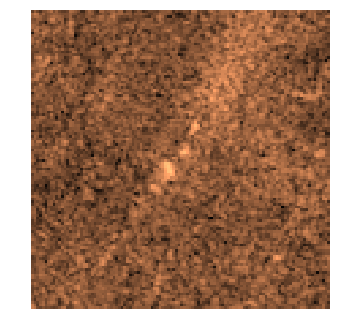

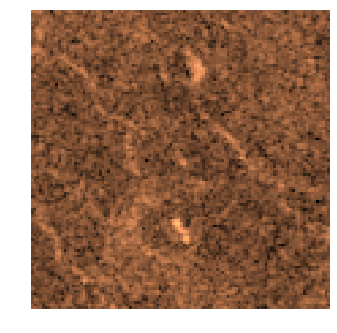

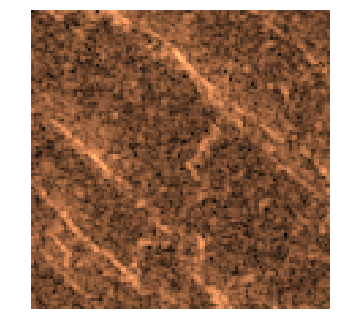

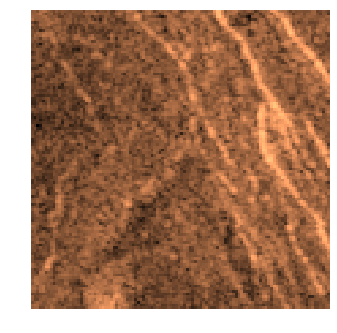

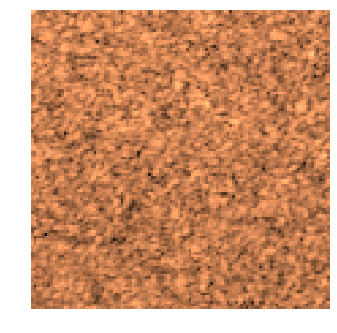

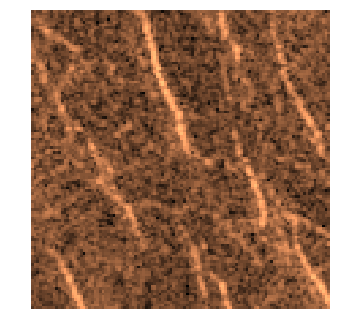

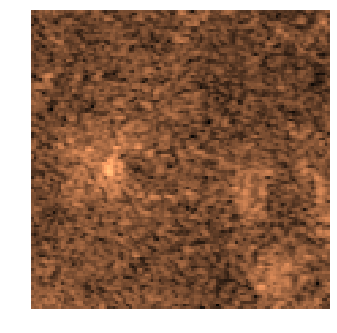

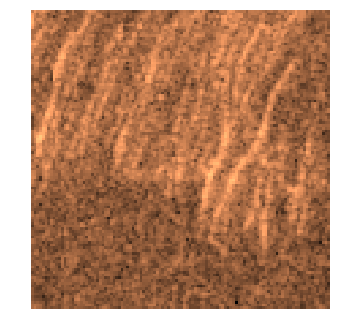

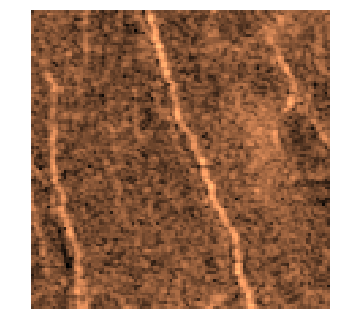

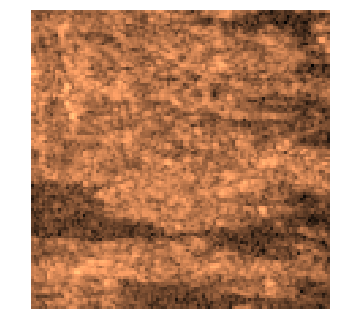

In [44]:
for i in range(10):
    n = randint(0,len(imagenes_sin_volcanes) )
    plt.imshow(imagenes_sin_volcanes[n],cmap='copper')
    plt.axis('off')
    plt.show()

In [74]:
len(imagenes_sin_volcanes)

146192

In [8]:
#muestrear los sin volcanes
import random
imagenes_sin_volcanes = random.sample(imagenes_sin_volcanes,  8300)
len(imagenes_sin_volcanes)

8300

In [100]:
np.asarray(labels_extras).shape

(1434, 3)

In [72]:
idx_train = np.random.choice(np.arange(len(imagenes_volcanes)), 1000, replace=False)
mask = np.zeros(len(imagenes_volcanes),dtype=bool) #np.ones_like(a,dtype=bool)
mask[idx_train] = True #train

imagenes_volcanes_train = np.asarray(imagenes_volcanes)[mask]
imagenes_volcanes_test = np.asarray(imagenes_volcanes)[~mask]

#idx_test = np.random.choice(np.arange(len(imagenes_sin_volcanes)), 1000, replace=False)
print(imagenes_volcanes_train.shape)
print(imagenes_volcanes_test.shape)

(1000, 110, 110)
(434, 110, 110)


In [61]:
imagenes_sin_volcanes

[array([[ 97,  83,  97, ...,  86,  91, 109],
        [ 95,  95,  89, ...,  98,  97,  92],
        [102, 101,  92, ...,  98, 100,  97],
        ..., 
        [104, 108,  95, ...,  91,  98,  93],
        [106,  98,  78, ..., 102, 108, 110],
        [ 98,  90,  77, ..., 101,  94, 107]], dtype=uint8),
 array([[ 99,  90, 101, ..., 110, 103, 113],
        [100,  87, 105, ..., 116, 114, 119],
        [ 99,  95, 104, ...,  98, 109, 107],
        ..., 
        [117, 114, 111, ..., 111, 105, 112],
        [104, 121, 133, ..., 116, 110, 113],
        [118, 116, 114, ..., 107, 106,  92]], dtype=uint8),
 array([[111, 108, 103, ...,  88,  98, 115],
        [ 94,  93, 103, ...,  97, 105, 121],
        [ 93, 114, 125, ..., 117, 121, 106],
        ..., 
        [119, 112,  93, ..., 114,  96, 106],
        [103, 112, 110, ...,  88,  85,  86],
        [110,  99, 103, ..., 105, 104, 105]], dtype=uint8),
 array([[135, 128, 118, ..., 146, 131, 111],
        [119, 108, 110, ..., 145, 137, 124],
        [149,

In [76]:
##LABELS
ones = np.ones(len(imagenes_volcanes))

labels_plus = np.concatenate((ones.reshape(-1,1),labels_extras),axis=1) #son: volcan?, tipo,r,volcanes en la foto
labels_plus

(1434, 4)

In [86]:
aux = np.concatenate((labels_volcanes_train, labels_sin_volcanes_train),axis=0)
aux


array([[  1.      ,   1.      ,  32.98    ,   2.      ],
       [  1.      ,   1.      ,  16.969999,   3.      ],
       [  1.      ,   2.      ,  12.04    ,   4.      ],
       ..., 
       [  0.      ,        nan,        nan,        nan],
       [  0.      ,        nan,        nan,        nan],
       [  0.      ,        nan,        nan,        nan]])

In [9]:
##---Volcanes---
idx_train = np.random.choice(np.arange(len(imagenes_volcanes)), 1000, replace=False)
mask = np.zeros(len(imagenes_volcanes),dtype=bool) #np.ones_like(a,dtype=bool)
mask[idx_train] = True #train

imagenes_volcanes_train = np.asarray(imagenes_volcanes)[mask]
imagenes_volcanes_test = np.asarray(imagenes_volcanes)[~mask]

##LABELS
ones = np.ones(len(imagenes_volcanes))
labels_plus = np.concatenate((ones.reshape(-1,1),labels_extras),axis=1) #son: volcan?, tipo,r,volcanes en la foto

labels_volcanes_train = labels_plus[mask]
labels_volcanes_test = labels_plus[~mask]


##---No Volcanes---
idx_train = np.random.choice(np.arange(len(imagenes_sin_volcanes)), 6000, replace=False)
mask = np.zeros(len(imagenes_sin_volcanes),dtype=bool) #np.ones_like(a,dtype=bool)
mask[idx_train] = True #train

imagenes_sin_volcanes_train = np.asarray(imagenes_sin_volcanes)[mask]
imagenes_sin_volcanes_test = np.asarray(imagenes_sin_volcanes)[~mask]

##LABELS
zeros = np.zeros(len(imagenes_sin_volcanes))
aux = np.empty((len(imagenes_sin_volcanes),3))
aux[:] = np.nan
labels_plus = np.concatenate((zeros.reshape(-1,1),aux),axis=1) #son: volcan?, tipo,r,volcanes en la foto

labels_sin_volcanes_train = labels_plus[mask]
labels_sin_volcanes_test = labels_plus[~mask]

##ARMAR DATASET FINAL

##ENTRENAMIENTO 
imagenes_train = np.concatenate((imagenes_volcanes_train, imagenes_sin_volcanes_train),axis=0)
labels_train = np.concatenate((labels_volcanes_train, labels_sin_volcanes_train),axis=0)

#shuffle indexs
s = np.arange(imagenes_train.shape[0])
np.random.shuffle(s)
imagenes_train = imagenes_train[s]
labels_train = labels_train[s]

print(imagenes_train.shape)
print(labels_train.shape)

##TEST
imagenes_test = np.concatenate((imagenes_volcanes_test, imagenes_sin_volcanes_test),axis=0)
labels_test = np.concatenate((labels_volcanes_test, labels_sin_volcanes_test),axis=0)

#shuffle indexs
s = np.arange(imagenes_test.shape[0])
np.random.shuffle(s)
imagenes_test = imagenes_test[s]
labels_test = labels_test[s]

print(imagenes_test.shape)
print(labels_test.shape)

"""

#armar dataset final
dataset = np.asarray(imagenes_volcanes + imagenes_sin_volcanes)

labels = np.asarray(np.ones(len(imagenes_volcanes)).tolist() + np.zeros(len(imagenes_sin_volcanes)).tolist())

aux = np.empty((len(imagenes_sin_volcanes),3))
aux[:] = np.nan
extra_data = np.asarray( labels_extras + aux.tolist() ) #son: tipo,r,volcan auxiliar


labels_plus = np.concatenate((labels.reshape(-1,1),extra_data),axis=1) #son: volcan?, tipo,r,volcanes en la foto

#shuffle indexs
s = np.arange(labels.shape[0])
np.random.shuffle(s)

dataset_train = random.sample(imagenes_sin_volcanes,  5000)
dataset_test = random.sample(imagenes_sin_volcanes,  5000)

labels_train =
labels_test = 

labels_test = labels_sample.sample(10000,random_state=200)
labels_train = labels_sample.drop(labels_test.index)

#train-test split

"""


#------------------------save it
f = open('train_labels.csv', 'w') 
writer = csv.writer(f)

writer.writerow(["Volcano?","Type","Radius","Number Volcanoes"])
a_escribir = labels_train.tolist()
for fila in a_escribir:
    a = np.int(fila[0])
    if not np.isnan(fila[1]):
        b = np.int(fila[1])      
    else:
        b = fila[1]
    c = fila[2]
    if not np.isnan(fila[3]):
        d = np.int(fila[3])      
    else:
        d = fila[3]   
    writer.writerow([a,b,c,d])
f.close()

f = open('test_labels.csv', 'w') 
writer = csv.writer(f)

writer.writerow(["Volcano?","Type","Radius","Number Volcanoes"])
a_escribir = labels_test.tolist()
for fila in a_escribir:
    a = np.int(fila[0])
    if not np.isnan(fila[1]):
        b = np.int(fila[1])      
    else:
        b = fila[1]
    c = fila[2]
    if not np.isnan(fila[3]):
        d = np.int(fila[3])      
    else:
        d = fila[3]
    writer.writerow([a,b,c,d])
f.close()




to_write = imagenes_train.reshape(imagenes_train.shape[0],imagenes_train.shape[1]*imagenes_train.shape[2])
print(to_write.shape)

f = open('train_images.csv', 'w') 
writer = csv.writer(f)      
writer.writerows(to_write)
f.close()

to_write = imagenes_test.reshape(imagenes_test.shape[0],imagenes_test.shape[1]*imagenes_test.shape[2])
print(to_write.shape)

f = open('test_images.csv', 'w') 
writer = csv.writer(f)      
writer.writerows(to_write)
f.close()

#np.savetxt('images.csv',to_write[s],fmt='%u',delimiter=',')



#np.savetxt('prueba.csv',labels_plus[s],fmt='%i,%i,%.3f,%i',delimiter=',')
print("finalizado")

(7000, 110, 110)
(7000, 4)
(2734, 110, 110)
(2734, 4)
(7000, 12100)
(2734, 12100)
finalizado


In [244]:
dataset[s].reshape(dataset.shape[0],dataset.shape[1]*dataset.shape[2])

array([[115, 106, 106, ..., 112,  88, 110],
       [144, 131, 117, ..., 132, 132, 123],
       [110, 120, 118, ..., 107,  98,  97],
       ..., 
       [ 97, 102,  82, ...,  88,  92, 110],
       [103, 114,  98, ...,  95,  93,  94],
       [ 96, 101, 120, ...,  96, 106, 110]], dtype=uint8)

In [2]:
## ver si se grabaron bien

df = pd.read_csv('labels.csv')
df.head()

Volcano?  Type  Radius  Number Volcanoes
0         0   NaN     NaN               NaN
1         0   NaN     NaN               NaN
2         0   NaN     NaN               NaN
3         0   NaN     NaN               NaN
4         0   NaN     NaN               NaN

In [3]:
images = pd.read_csv('images.csv',header=None).values
images = images.reshape(images.shape[0],110,110)
df.head()

Volcano?  Type  Radius  Number Volcanoes
0         0   NaN     NaN               NaN
1         0   NaN     NaN               NaN
2         0   NaN     NaN               NaN
3         0   NaN     NaN               NaN
4         0   NaN     NaN               NaN

In [28]:
aux = df.values
aux[30]

array([  1. ,   2. ,  26.4,   3. ])

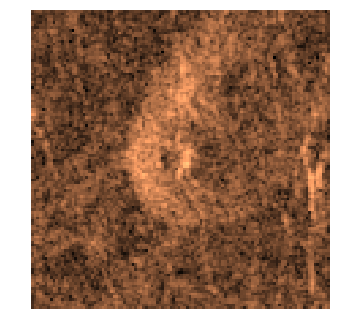

In [32]:
plt.imshow(images[30],cmap='copper')
plt.axis('off')
plt.show()